In [291]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [292]:
# Let's import to our data and check the basics.
terror_Data = pd.read_csv('/kaggle/input/gtd/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [293]:
terror_Data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [294]:
#iris data
print("There are " + str(len(terror_Data)) + " observations in the globalterrorismdb dataset")
print("There are " + str(len(terror_Data.columns)) + " variables in the dataset.")

There are 181691 observations in the globalterrorismdb dataset
There are 135 variables in the dataset.


In [295]:
terror_Data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


# Choosing important columns

In [296]:
terror_Data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [297]:
# I'm just take important data in whole dataset those I'm using further processing.
data=terror_Data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# Statistical Analysis of Data

In [298]:
data.dtypes

Year             int64
Month            int64
Day              int64
Country         object
state           object
Region          object
city            object
latitude       float64
longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
Motive          object
dtype: object

In [299]:
print(data.shape)

(181691, 18)


In [300]:
data.ndim


2

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [302]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


# # Cleaning The Data

### 1.Handling missing value

In [303]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [304]:
# List of columns with missing values
#columns_with_missing = data.columns[data.isnull().any()]

# Impute numerical columns with mean
#numerical_columns = data.select_dtypes(include=['float64'])
#numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
#data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Impute categorical columns with mode
#categorical_columns = data.select_dtypes(include=['object'])
#categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
#data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Verify if all missing values are handled
#missing_counts = data.isnull().sum()
#print(missing_counts)

### 2.Handling duplicated value

In [305]:
print("Total number of duplicate data: ",data.duplicated().sum())

Total number of duplicate data:  9498


In [306]:
data.drop_duplicates(inplace = True)

In [307]:
print("Total number of duplicate data after update: ",data.duplicated().sum())

Total number of duplicate data after update:  0


# Extract  Features and Insights  of data

In [308]:

print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [309]:
data.Group.value_counts()[1:15]

Group
Taliban                                             7301
Islamic State of Iraq and the Levant (ISIL)         5187
Shining Path (SL)                                   3758
Al-Shabaab                                          3266
New People's Army (NPA)                             2697
Farabundo Marti National Liberation Front (FMLN)    2516
Irish Republican Army (IRA)                         2461
Boko Haram                                          2381
Revolutionary Armed Forces of Colombia (FARC)       2377
Kurdistan Workers' Party (PKK)                      2233
Basque Fatherland and Freedom (ETA)                 1901
Communist Party of India - Maoist (CPI-Maoist)      1852
Maoists                                             1608
Liberation Tigers of Tamil Eelam (LTTE)             1573
Name: count, dtype: int64

In [310]:
# Total Number of people killed in terror attack
killData = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 408242


In [311]:
# Let's look at what types of attacks these deaths were made of.
attackData = data.loc[:,'AttackType']

In [312]:
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData


AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,158774.0,24443.0,156434.0,3592.0,3718.0,4478.0,23989.0,880.0,31934.0


In [313]:

#Number of Killed in Terrorist Attacks by Countries
countryData = data.loc[:,'Country']

In [314]:

# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39149.0,42.0,10973.0,0.0,3033.0,0.0,488.0,37.0,23.0,30.0,...,1.0,0.0,1496.0,97.0,1.0,8691.0,119.0,324.0,70.0,154.0


In [315]:
# Finding hot zones of terrorism

hot_zones = data['Country'].value_counts().head(10)
print(hot_zones)


Country
Iraq              23459
Pakistan          13795
Afghanistan       12512
India             11585
Colombia           7504
Philippines        6771
Peru               5048
United Kingdom     4998
El Salvador        4305
Somalia            4121
Name: count, dtype: int64


In [316]:
# Analyzing target types
target_types = data['Target'].value_counts()
print(target_types)

Target
Civilians                        6369
Unknown                          5504
Soldiers                         3093
Patrol                           2930
Checkpoint                       2777
                                 ... 
group                               1
5 Vehicle Logging Convoy            1
Branch near Malacanang Palace       1
3 Kurdish Civilians                 1
Hmeymim Air Base                    1
Name: count, Length: 86005, dtype: int64


In [317]:
# Analyzing target types
target_types = data['Target_type'].value_counts()
print(target_types)

Target_type
Private Citizens & Property       41483
Military                          27561
Police                            23832
Government (General)              20516
Business                          18932
Transportation                     6111
Unknown                            5229
Religious Figures/Institutions     4295
Educational Institution            4180
Utilities                          4169
Government (Diplomatic)            3526
Terrorists/Non-State Militia       3005
Journalists & Media                2887
Violent Political Party            1806
Airports & Aircraft                1320
NGO                                 956
Telecommunication                   927
Tourists                            429
Maritime                            340
Food or Water Supply                298
Abortion Related                    257
Other                               134
Name: count, dtype: int64


In [318]:

# Analyzing weapon types used in attacks
weapon_types =data['Weapon_type'].value_counts()
print(weapon_types)


Weapon_type
Explosives                                                                     86373
Firearms                                                                       57412
Unknown                                                                        14510
Incendiary                                                                      9576
Melee                                                                           3535
Chemical                                                                         321
Sabotage Equipment                                                               136
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            112
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                         

# Data Visualization

### People Killed and Wounded In Each Year

In [319]:

a=data[["Year","Wounded"]].groupby("Year").sum()
a.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


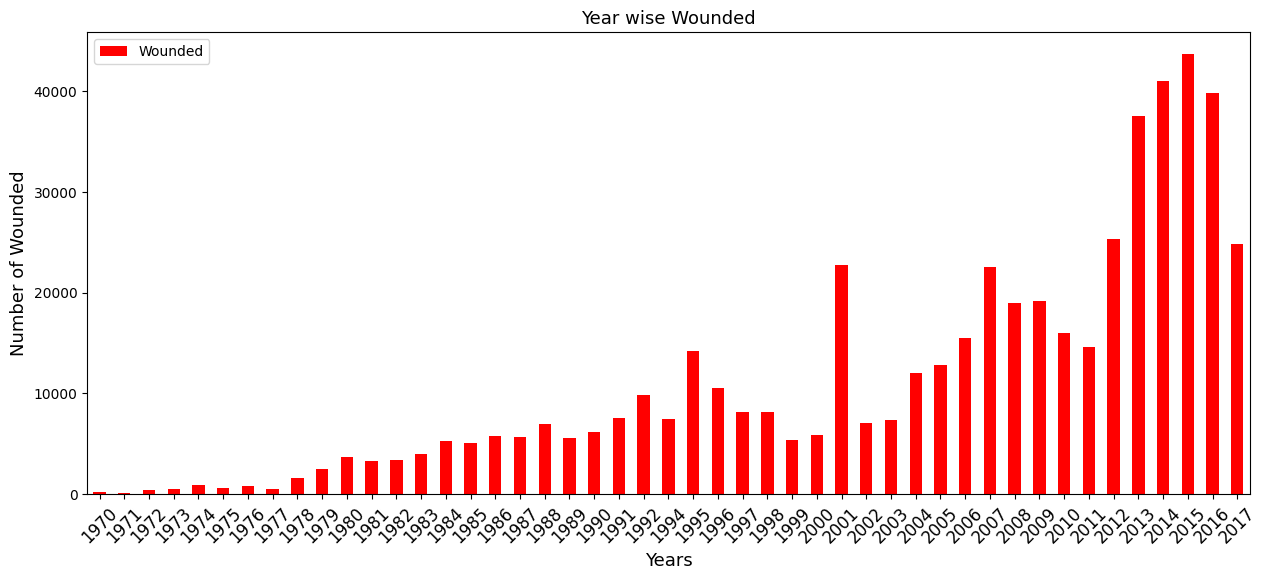

In [320]:
a.plot(kind="bar",color="red",figsize=(15,6))
plt.title("Year wise Wounded",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12,rotation=45)
plt.ylabel("Number of Wounded",fontsize=13)
plt.show()


In [321]:
b=data[["Year","Killed"]].groupby("Year").sum()
b.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,565.0
1973,370.0
1974,539.0


Text(0, 0.5, 'Number of People killed')

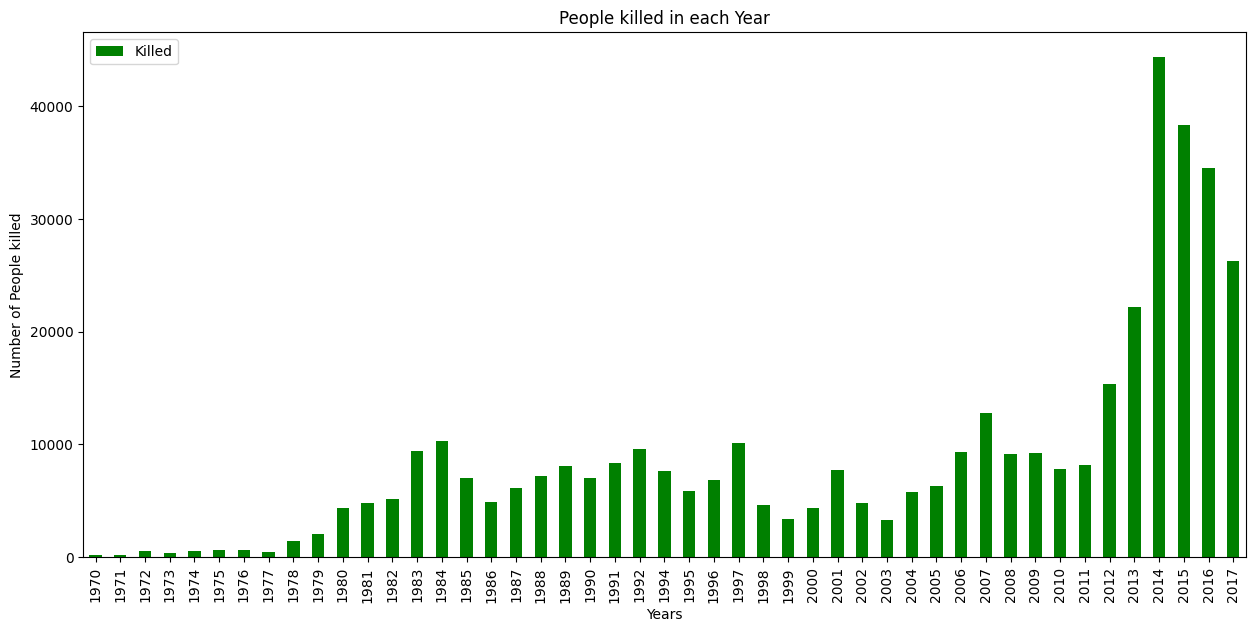

In [322]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)

#Wounded
b.plot(kind="bar",color="green",figsize=(15,15),ax=ax0)
ax0.set_title("People killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People killed")

# Number of Terrorist Activities each Year

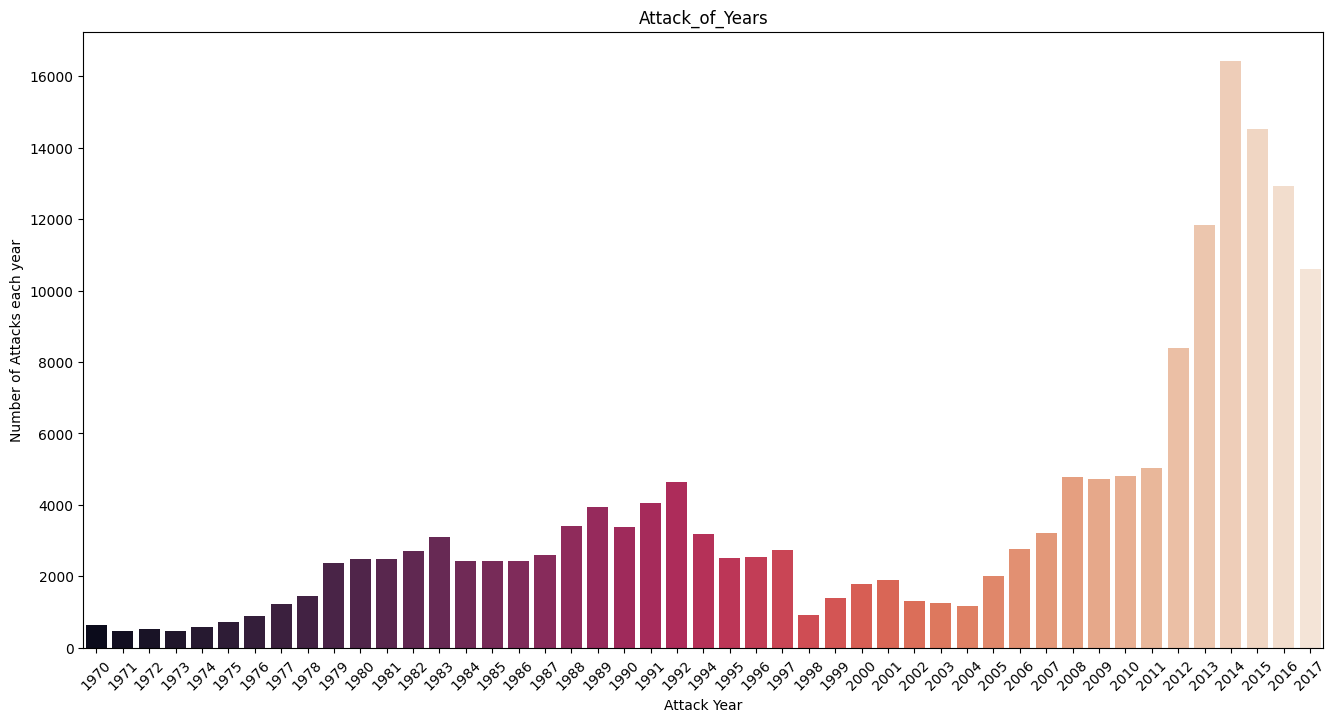

In [323]:
#Number of Terrorist Activities each Year
x_year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,8))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

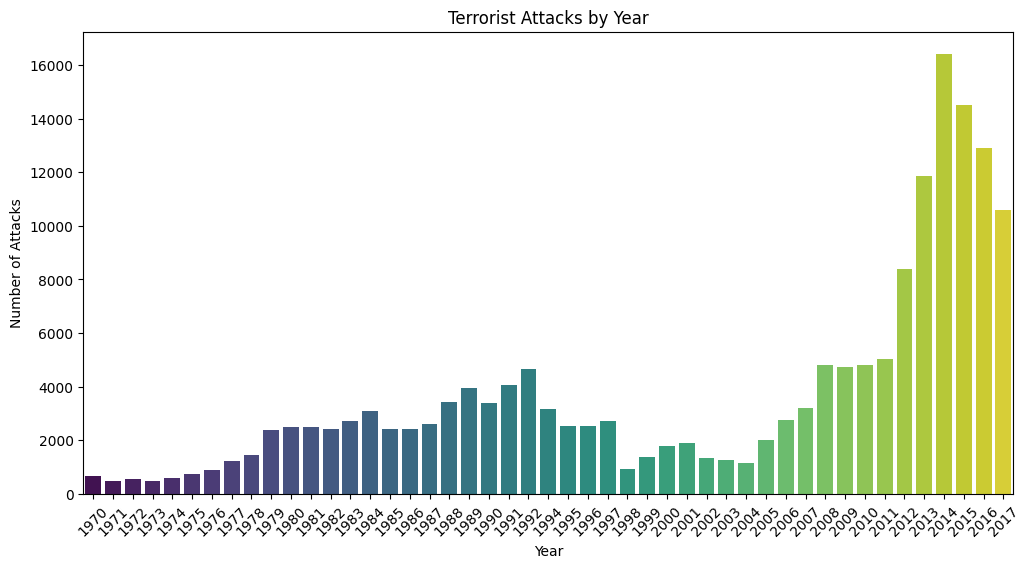

In [324]:
# Plotting a bar chart of terrorist attacks by year
plt.figure(figsize=(12, 6))
attacks_by_year =data['Year'].value_counts().sort_index()
sns.barplot(x=attacks_by_year.index, y=attacks_by_year.values, palette='viridis')
plt.title('Terrorist Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

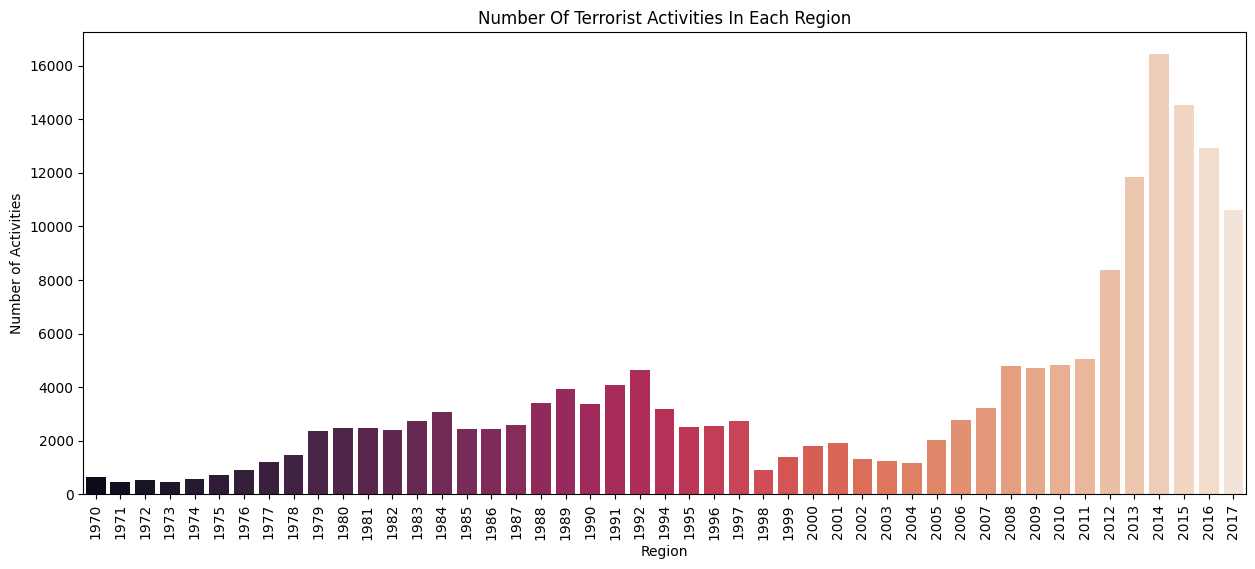

In [325]:
region_counts = data['Year'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x = region_counts.index, y = region_counts.values, palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities In Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Activities')
plt.show()

# Terrorist Activities by Region in each Year through Area Plot

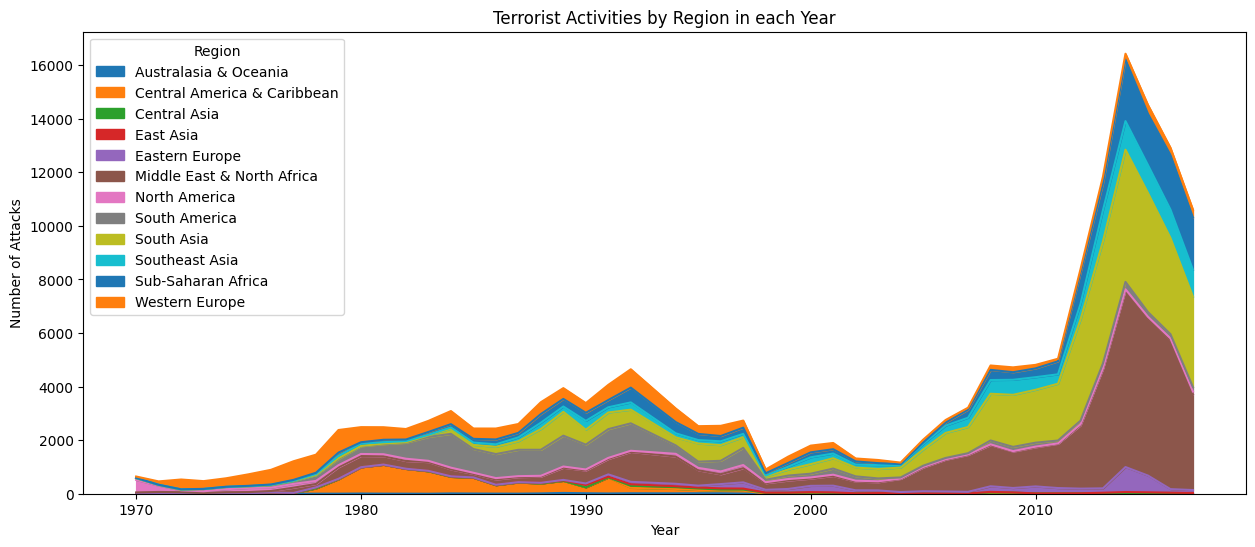

In [326]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [327]:
reg=pd.crosstab(data.Year,data.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,27,465,65,1,10,3,50
1971,1,5,0,1,4,55,237,24,0,6,2,125
1972,5,3,0,0,1,48,72,21,1,12,2,366
1973,1,6,0,2,1,19,62,83,1,2,4,289
1974,1,11,0,4,2,39,111,81,2,3,7,315


In [328]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
f=regt["Total"].sort_values(ascending=False)
f

Region
Middle East & North Africa     48721
South Asia                     43549
Sub-Saharan Africa             17090
South America                  16589
Western Europe                 15179
Southeast Asia                 12083
Central America & Caribbean     9058
Eastern Europe                  5013
North America                   3368
East Asia                        714
Central Asia                     554
Australasia & Oceania            275
Name: Total, dtype: int64

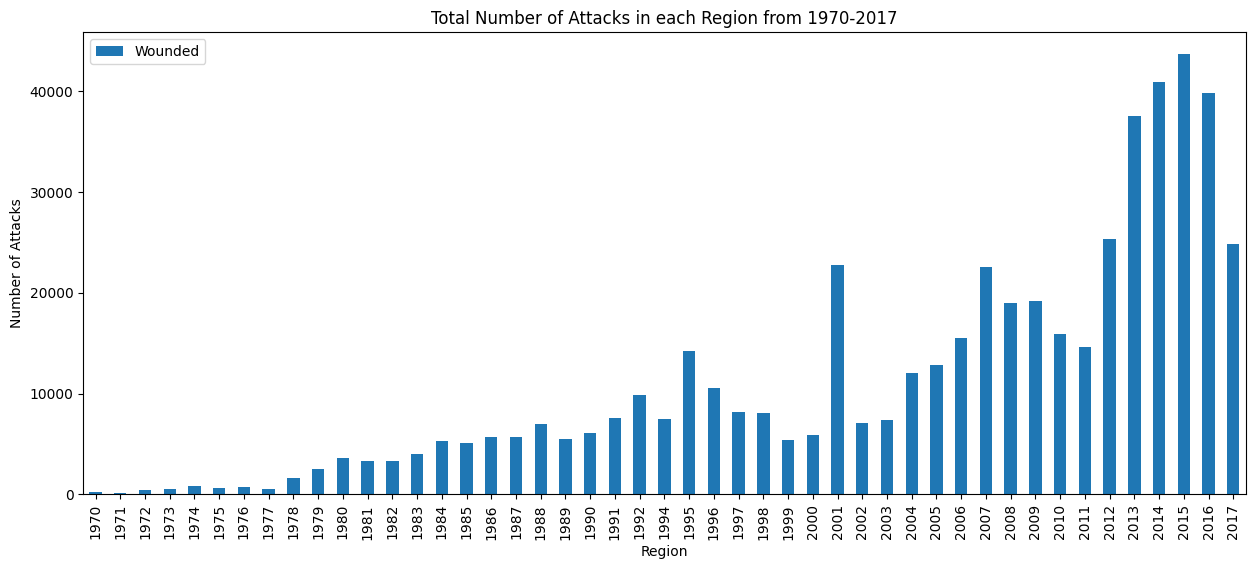

In [329]:
a.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

## Top Countries with highest number of Killed and Wounded

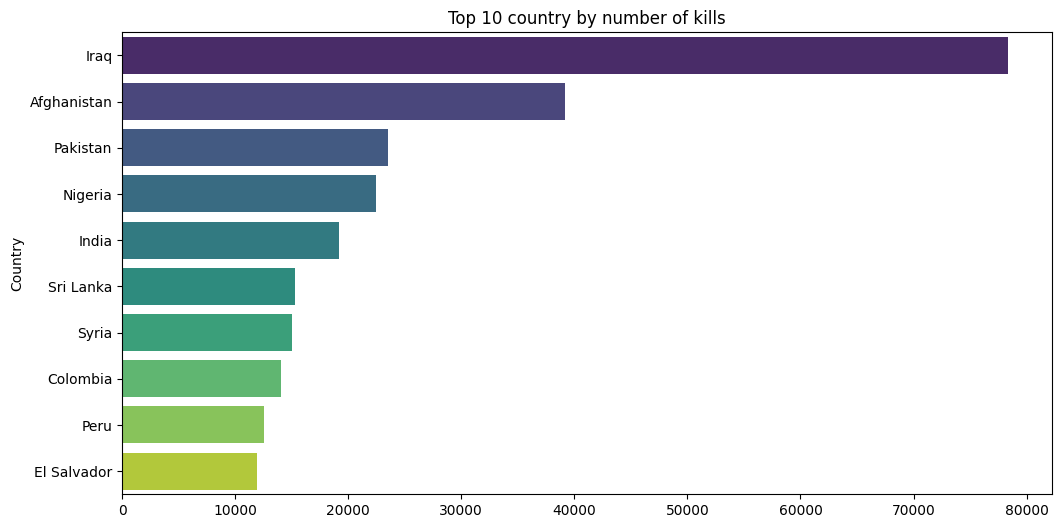

In [330]:
top_AttackType=data.groupby("Country").Killed.sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_AttackType.values, y=top_AttackType.index, palette="viridis")
plt.title("Top 10 country by number of kills")
plt.show()

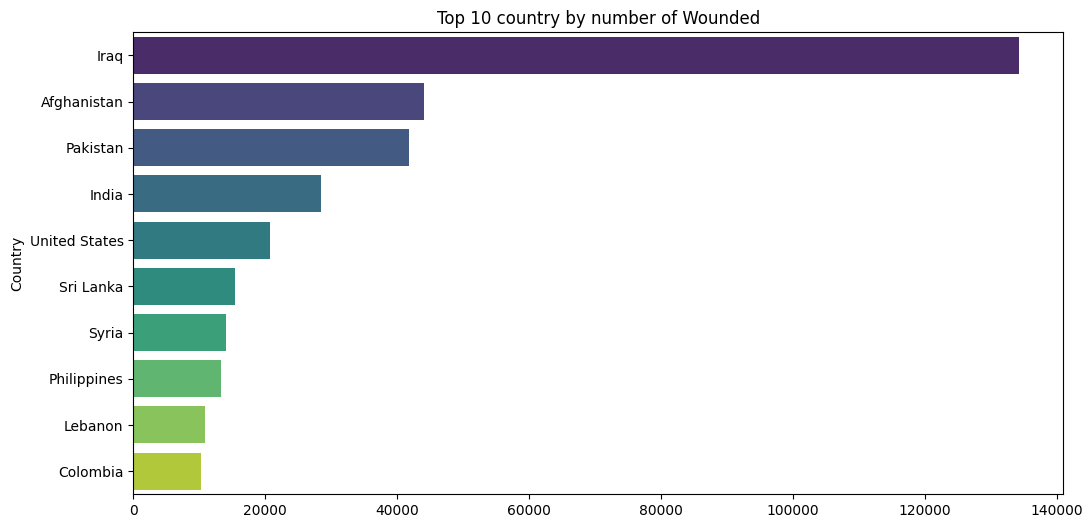

In [331]:
top_AttackType=data.groupby("Country").Wounded.sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_AttackType.values, y=top_AttackType.index, palette="viridis")
plt.title("Top 10 country by number of Wounded")
plt.show()

# Top Countries affected by Terror Attacks

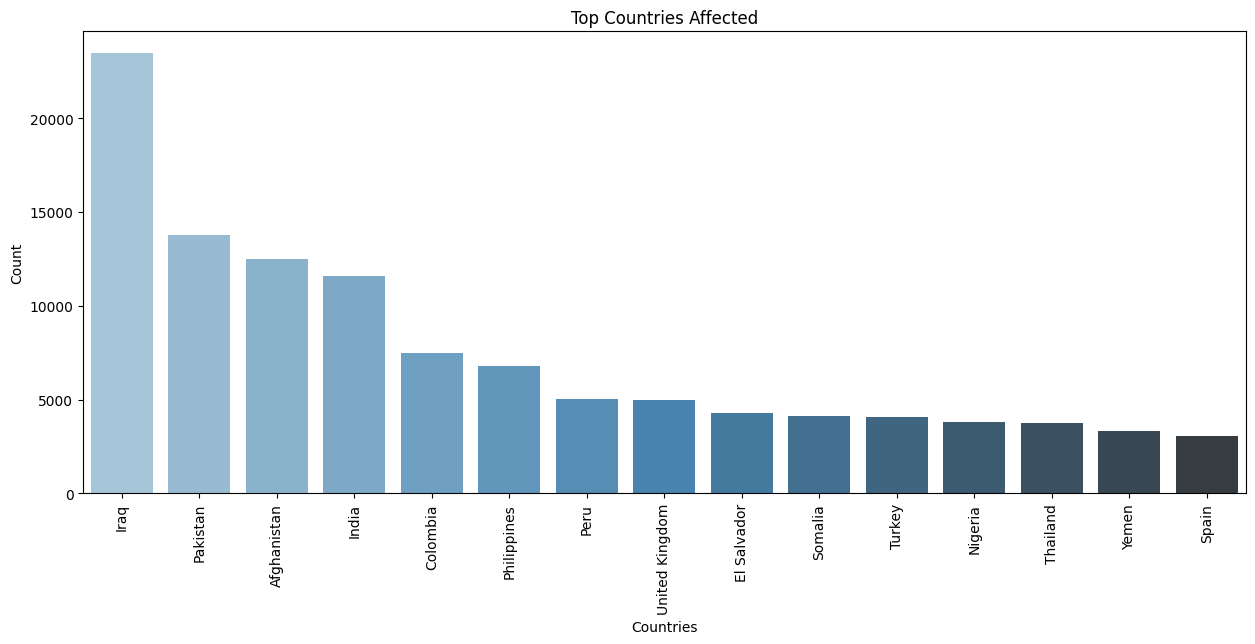

In [332]:
plt.subplots(figsize=(15,6))
sns.barplot(x = data['Country'].value_counts()[:15].index, y = data['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [333]:
data['Wounded'] = data['Wounded'].fillna(0).astype(int)
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['casualities'] = data['Killed'] + data['Wounded']

In [334]:
df1 = data.sort_values(by='casualities',ascending=False)[:40]
heat=df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [335]:
import plotly.offline as py
import plotly.graph_objs as go

heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index)

data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='heatmap',show_link=False)